# HDB DATA, Exercise

## Data Wrangling & Pre-Process(Without Pandas)

### Data Source Link :
https://data.gov.sg/dataset/resale-flat-prices?resource_id=1b702208-44bf-4829-b620-4615ee19b57c

Dataset information, HDB resale price from the period of Jan 2015 to Dec 2016 only

In [1]:
with open("resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv", 'r') as data:
    data = data.readlines()
    raw_data = []
    for i in data:
        raw_data.append(i)

In [2]:
# Checking the column list
heading = raw_data.pop(0).split(',')
print(heading)

['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price\n']


In [3]:
# Replace inappropriate characters for easier manipulation
new_head = []
for i in heading:
    i = i.replace('\n', '')
    
    new_head.append(i)
print(new_head)

['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price']


In [4]:
# Create empty data with column name in dictionary format
data_dict = {}
zip_data = zip(new_head, raw_data)
for key, value in dict(zip_data).items():
    #print(value)
    print(key)
    data_dict[key] = []

month
town
flat_type
block
street_name
storey_range
floor_area_sqm
flat_model
lease_commence_date
remaining_lease
resale_price


In [5]:
print(data_dict)

{'month': [], 'town': [], 'flat_type': [], 'block': [], 'street_name': [], 'storey_range': [], 'floor_area_sqm': [], 'flat_model': [], 'lease_commence_date': [], 'remaining_lease': [], 'resale_price': []}


##  Append all raw data's value into dictionary format

In [6]:
# Important Note, Do not run this code twice, it will duplicate your orignal values into the same 'data_dict' holder
for i in range(0, len(raw_data)):
    #print(float(raw_data[i].split(',')[10]))
    
    data_dict['month'].append(raw_data[i].split(',')[0])
    data_dict['town'].append(raw_data[i].split(',')[1])
    data_dict['flat_type'].append(raw_data[i].split(',')[2])
    data_dict['block'].append(raw_data[i].split(',')[3])
    data_dict['street_name'].append(raw_data[i].split(',')[4])
    data_dict['storey_range'].append(raw_data[i].split(',')[5])
    data_dict['floor_area_sqm'].append(raw_data[i].split(',')[6])
    data_dict['flat_model'].append(raw_data[i].split(',')[7])
    data_dict['lease_commence_date'].append(raw_data[i].split(',')[8])
    data_dict['remaining_lease'].append(raw_data[i].split(',')[9])
    data_dict['resale_price'].append(float(raw_data[i].split(',')[10]))

In [7]:
print(len(data_dict['town']))
print(len(data_dict['resale_price'])) 
# Test the length of value in each key from "data_dict", is it match?
# if not, something wrong!
# Original rows should be 37153 without first row(column names)

37153
37153


## Create "simple_stat" function

In [8]:
import numpy as np

In [9]:
def simple_stat(price_list):
    mode = input("Input the mode, \'m\' for mean calculation or \'std\' for standard deviation : ")
    mode_mean_format = ['mean', 'm']
    mode_std_format = ['std', 'stdev', 's']
    if mode.lower() in mode_mean_format:
        
        return float("{:.2f}".format(np.mean(price_list)))
    
    elif mode.lower() in mode_std_format:
        
        return float("{:.2f}".format(np.std(price_list, ddof = 1)))


In [10]:
# Some backend testing before create the main function
simple_stat(data_dict['resale_price'])

Input the mode, 'm' for mean calculation or 'std' for standard deviation : m


436862.79

In [11]:
# Find out the unique value of town name from the dataset
set(data_dict['town'])

{'ANG MO KIO',
 'BEDOK',
 'BISHAN',
 'BUKIT BATOK',
 'BUKIT MERAH',
 'BUKIT PANJANG',
 'BUKIT TIMAH',
 'CENTRAL AREA',
 'CHOA CHU KANG',
 'CLEMENTI',
 'GEYLANG',
 'HOUGANG',
 'JURONG EAST',
 'JURONG WEST',
 'KALLANG/WHAMPOA',
 'MARINE PARADE',
 'PASIR RIS',
 'PUNGGOL',
 'QUEENSTOWN',
 'SEMBAWANG',
 'SENGKANG',
 'SERANGOON',
 'TAMPINES',
 'TOA PAYOH',
 'WOODLANDS',
 'YISHUN'}

In [12]:
# Creating a loop to get all Ang Mo Kio Resale price and apppend it into the empty list holder
total_amk_resale_price = []
# Find out the total number of Ang Mo Kio rows from the dataset, accuracy testing for the function
counter = 0
for i in range(0, len(data_dict['town'])):
    if data_dict['town'][i] == "ANG MO KIO":
        counter +=1
        total_amk_resale_price.append(data_dict['resale_price'][i])
print(counter) 


1851


In [13]:
simple_stat(total_amk_resale_price)

Input the mode, 'm' for mean calculation or 'std' for standard deviation : m


408422.98

# Above code were the preparation and concept testing before creating the Interactive Function. Below code is to combine the concepts into a single function with two main objects which allow the user:

* Return the mean resale price of the district
* Return the Standard Deviation of the specified district's resale price

It can enhance further based on the concept of human-centered design with additional parameters. For some examples, allow the user to select the floor level(e.g. high floor), square feet size(e.g. 500 sqft - 800 sqft).

In [14]:
def district_resaleprice():
    
    user_input = input("Enter a name of the district in Singapore or \'L/List\' to show the available districts in SG : ")
    list_format = ['l', 'list']
    district_data = ['ANG MO KIO',
                 'BEDOK',
                 'BISHAN',
                 'BUKIT BATOK',
                 'BUKIT MERAH',
                 'BUKIT PANJANG',
                 'BUKIT TIMAH',
                 'CENTRAL AREA',
                 'CHOA CHU KANG',
                 'CLEMENTI',
                 'GEYLANG',
                 'HOUGANG',
                 'JURONG EAST',
                 'JURONG WEST',
                 'KALLANG/WHAMPOA',
                 'MARINE PARADE',
                 'PASIR RIS',
                 'PUNGGOL',
                 'QUEENSTOWN',
                 'SEMBAWANG',
                 'SENGKANG',
                 'SERANGOON',
                 'TAMPINES',
                 'TOA PAYOH',
                 'WOODLANDS',
                 'YISHUN']
    
    target_district_pricelist = []
    # "data_dict" is a global variable
    while True:
        if user_input.lower() in list_format:
            print(district_data)
            user_input = input("Enter a name of the district in Singapore : ")
        
        elif user_input.upper() in district_data:
            district = user_input.upper()
            total_resale_price = []
            counter = 0
            for i in range(0, len(data_dict['town'])):
                if data_dict['town'][i] == district:
                    counter +=1
                    total_resale_price.append(data_dict['resale_price'][i])
                    
            print(f"\nYour requested district : \'{district}\'")
            print(f'The length of the requested district from the data is : {counter}')  
            target_district_pricelist.append(total_resale_price)
            break
            
    # Once user key-in the one of the correct name from district data, it will auto call the below function
    def simple_stat(target_district_pricelist):
        mode = input("Input the calculation mode of resale price(The Result is Derived From The Data Period of Jan 2015 - Dec 2016), \'m\' for the mean(average) or \'std\' for standard deviation  : ")
        mode_mean_format = ['mean', 'm']
        mode_std_format = ['std', 'stdev', 's']
        if mode.lower() in mode_mean_format:

            return float("{:.2f}".format(np.mean(target_district_pricelist)))

        elif mode.lower() in mode_std_format:

            return float("{:.2f}".format(np.std(target_district_pricelist, ddof = 1)))

        
    
    print(f'\nThe average resale price of requested region \'{district}\' is SGD {simple_stat(target_district_pricelist)}. ')
    
    #return target_district_pricelist
            

In [15]:
district_resaleprice()

Enter a name of the district in Singapore or 'L/List' to show the available districts in SG : Ang Mo Kio

Your requested district : 'ANG MO KIO'
The length of the requested district from the data is : 1851
Input the calculation mode of resale price(The Result is Derived From The Data Period of Jan 2015 - Dec 2016), 'm' for the mean(average) or 'std' for standard deviation  : m

The average resale price of requested region 'ANG MO KIO' is SGD 408422.98. 


## Build A Simple Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('mako_r')

In [17]:
df = pd.DataFrame(data_dict)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68,New Generation,1980,64,290000.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  object 
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  object 
 9   remaining_lease      37153 non-null  object 
 10  resale_price         37153 non-null  float64
dtypes: float64(1), object(10)
memory usage: 3.1+ MB


<AxesSubplot:xlabel='lease_commence_date'>

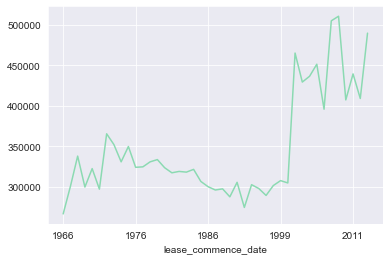

In [19]:
df[df.flat_type =='3 ROOM'].groupby('lease_commence_date')['resale_price'].mean().plot()

In [20]:
df_mean = df[df.flat_type =='3 ROOM'].groupby('lease_commence_date')[['resale_price']].mean().reset_index()

In [21]:
#Conver
# for i in df_mean.columns:
#     df_mean[i] = df_mean[i].astype('int64')
df_mean['lease_commence_date']=df_mean['lease_commence_date'].astype('int64')

In [22]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lease_commence_date  43 non-null     int64  
 1   resale_price         43 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 816.0 bytes


In [23]:
x = np.array(df_mean.lease_commence_date).reshape(-1,1)
y = np.array(df_mean.resale_price).reshape(-1,1)

In [24]:
model = LinearRegression()
model.fit(x,y)
y_predict = model.predict(x)

In [25]:
# Prediction of next 20 years, from 2014 - 2034
x_future = np.array(range(2014,2035)).reshape(-1,1)
y_future_predict = model.predict(x_future)

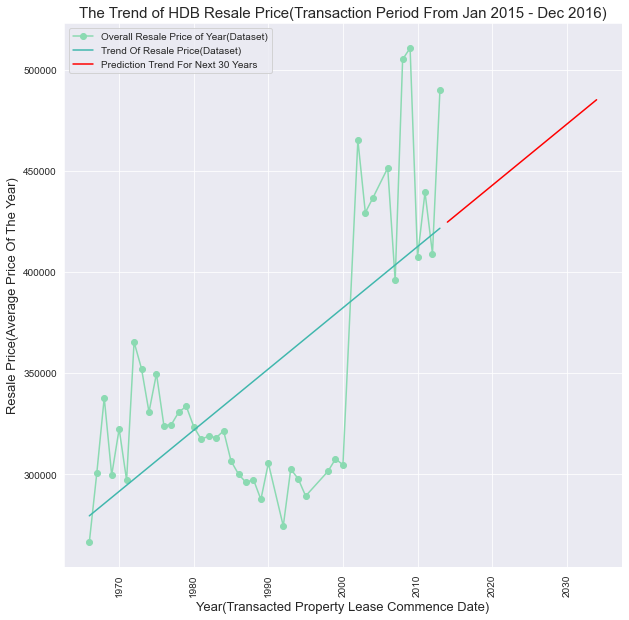

In [26]:
plt.figure(figsize = (10,10))
plt.plot(x, y, marker = 'o', label = 'Overall Resale Price of Year(Dataset)')
plt.plot(x, y_predict, label = 'Trend Of Resale Price(Dataset)')
plt.plot(x_future, y_future_predict, label = 'Prediction Trend For Next 30 Years', color = 'r')
plt.legend(loc = 'upper left')
plt.xlabel('Year(Transacted Property Lease Commence Date)', fontsize = 13)
plt.ylabel('Resale Price(Average Price Of The Year)', fontsize = 13)
plt.title('The Trend of HDB Resale Price(Transaction Period From Jan 2015 - Dec 2016)', fontsize = 15)
plt.xticks(rotation = 90);

# <mark> Summarize & Limitation: 

This is just a simple linear prediction model to visualize the trend of average resale price based on the transacted property's lease commence date from the dataset where all transactions happened only between Jan 2015 and Dec 2016.

There are limitations. The prediction is generated without taking into the consideration of transacted property's sqft, district popularity, floor level which potentially affects the final resale price. 